# Machine Learning (SVM & Random Forest)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import cross_validate
import seaborn as sn
import matplotlib.pyplot as plt
import graphviz
#pd.set_option('display.max_rows', 500)

#### Import dataset

In [2]:
ngs_reads = pd.read_json('exported_datasets/efcm_full_features.json')

In [3]:
ngs_reads.reset_index(drop=True, inplace=True)

In [4]:
# convert dict type columns to dataframes
for category in ngs_reads:
    if type(ngs_reads[category][0]) is dict:
        ngs_reads[category] = ngs_reads[category].apply(pd.DataFrame)

In [5]:
ngs_reads.columns

Index(['organism', 'technology', 'read_number', 'evaluation',
       'total_sequences', 'percent_gc', 'min_sequence_length',
       'max_sequence_length', 'module_1_status', 'module_2_status',
       'module_3_status', 'module_4_status', 'module_5_status',
       'module_6_status', 'module_7_status', 'module_8_status',
       'module_9_status', 'module_10_status', 'module_2_std_neg',
       'module_2_std_pos', 'module_2_a', 'module_3_alpha', 'module_3_beta',
       'module_6_ncount', 'module_7_alpha', 'module_7_beta', 'module_8_alpha',
       'module_8_beta'],
      dtype='object')

In [6]:
# remove features from first run for now

ngs_reads.drop(columns=['module_1_status', 'module_2_status', 'module_3_status', 'module_4_status',
                       'module_5_status', 'module_6_status', 'module_7_status', 'module_8_status',
                       'module_9_status', 'module_10_status', 'total_sequences', 'percent_gc',
                       'min_sequence_length', 'max_sequence_length'], inplace=True)

In [7]:
ngs_reads.columns

Index(['organism', 'technology', 'read_number', 'evaluation',
       'module_2_std_neg', 'module_2_std_pos', 'module_2_a', 'module_3_alpha',
       'module_3_beta', 'module_6_ncount', 'module_7_alpha', 'module_7_beta',
       'module_8_alpha', 'module_8_beta'],
      dtype='object')

#### extract target variable

In [8]:
target = ngs_reads.evaluation.values
ngs_reads.drop(columns='evaluation', inplace=True)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

#### remove unused columns from dataset

In [9]:
ngs_reads.drop(columns=['organism', 'technology', 'read_number'], inplace=True)
ngs_reads

,module_2_std_neg,module_2_std_pos,module_2_a,module_3_alpha,module_3_beta,module_6_ncount,module_7_alpha,module_7_beta,module_8_alpha,module_8_beta
0,0.385013,0.385415,0,166.409553,5.214479,0.879274,170.618513,1.005274,0.391439,18.665416
1,0.121340,0.068446,0,166.392354,5.221345,0.678714,170.592963,1.019400,0.082491,4.776467
2,0.315845,0.165511,0,166.140604,5.451245,0.002853,170.641425,0.982654,0.147022,9.723556
3,1.027438,0.425438,0,156.377108,14.652466,0.003016,170.626139,0.994454,0.156148,10.238692
4,0.262169,0.086567,0,165.721361,5.845131,0.580312,170.592963,1.019400,0.085682,5.014081
...,...,...,...,...,...,...,...,...,...,...
83,0.051924,0.072236,0,166.420364,4.940322,0.558369,170.461306,1.161733,0.035012,3.259176
84,0.088583,0.075866,0,166.432328,5.183535,11.703807,170.397161,1.134837,0.040512,2.163178
85,0.067566,0.062786,0,166.649269,4.959551,0.532231,170.407269,1.203378,-1.156613,0.001990
86,0.075292,0.070757,0,166.049585,5.179259,13.629396,170.497554,1.105446,0.044248,2.964755


#### train-test split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(ngs_reads, target, test_size=0.3, random_state=109)

#### Confusion Matrix Heatmap Training Set

<AxesSubplot:>

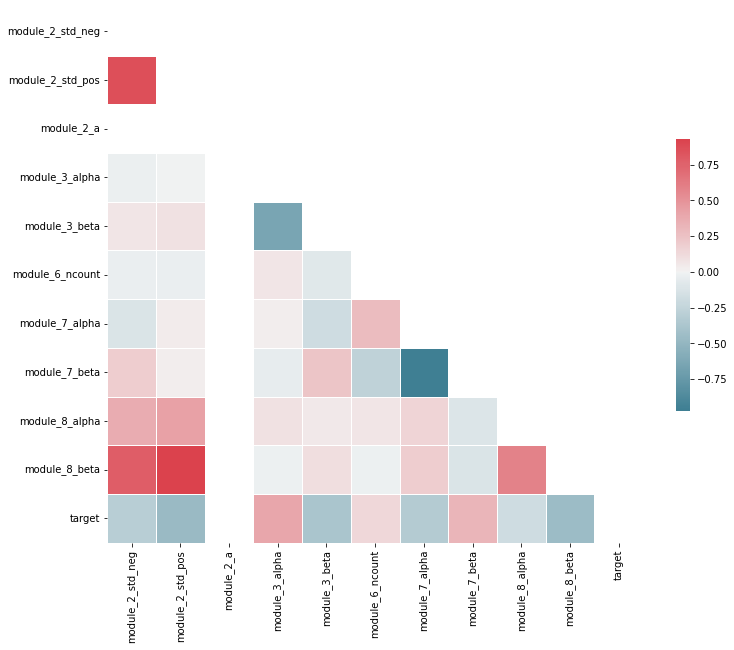

In [11]:
train = X_train.copy()
train.loc[:, 'target'] = y_train.tolist()
train

corr_matrix = train.corr()

mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))
cmap = sn.diverging_palette(220, 10, as_cmap=True)
sn.heatmap(corr_matrix, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink":.5})

#### Support Vector Machine Training

In [12]:
clf_svc = svm.SVC(kernel='linear')

In [13]:
clf_svc.fit(X_train, y_train)

SVC(kernel='linear')

##### SVM performance

In [14]:
y_pred=clf_svc.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.8148148148148148
Precision:  0.7727272727272727
Recall:  1.0
F1 Score:  0.8717948717948718


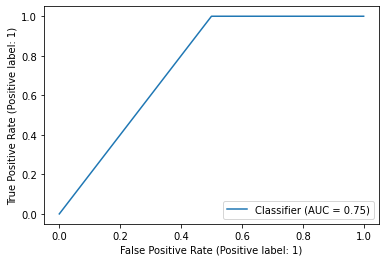

In [15]:
metrics.RocCurveDisplay.from_predictions(y_test, y_pred)

#### SVM with Cross Validation

In [16]:
clf_svm_cv = svm.SVC(kernel='linear')
scores = cross_validate(clf_svm_cv, ngs_reads, target, cv=5, 
                        scoring=('accuracy', 'f1'), return_train_score=True)
print("Accuracies: ", scores['test_accuracy'])
print("F1 Scores: ", scores['test_f1'])

print("Accuracy: %0.2f +/- %0.2f" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std()))
print("F1 Score: %0.2f +/- %0.2f" % (scores['test_f1'].mean(), scores['test_f1'].std()))

Accuracies:  [0.83333333 0.83333333 0.94444444 0.76470588 0.70588235]
F1 Scores:  [0.84210526 0.88       0.95652174 0.83333333 0.81481481]
Accuracy: 0.82 +/- 0.08
F1 Score: 0.87 +/- 0.05


#### Decision Tree

In [17]:
clf_dt = tree.DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_train, y_train)

In [18]:
y_pred = clf_dt.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


[Text(0.4230769230769231, 0.9, 'module_2_std_neg <= 0.113\ngini = 0.477\nsamples = 61\nvalue = [24, 37]\nclass = good'),
 Text(0.15384615384615385, 0.7, 'module_2_std_neg <= 0.096\ngini = 0.056\nsamples = 35\nvalue = [1, 34]\nclass = good'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [0, 31]\nclass = good'),
 Text(0.23076923076923078, 0.5, 'module_3_alpha <= 166.233\ngini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = good'),
 Text(0.15384615384615385, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = ugly'),
 Text(0.3076923076923077, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = good'),
 Text(0.6923076923076923, 0.7, 'module_3_beta <= 5.178\ngini = 0.204\nsamples = 26\nvalue = [23, 3]\nclass = ugly'),
 Text(0.5384615384615384, 0.5, 'module_6_ncount <= 0.606\ngini = 0.5\nsamples = 4\nvalue = [2, 2]\nclass = ugly'),
 Text(0.46153846153846156, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = ugly'),
 Text(0.6153846153846154, 0.3, 'gini = 0.0\nsa

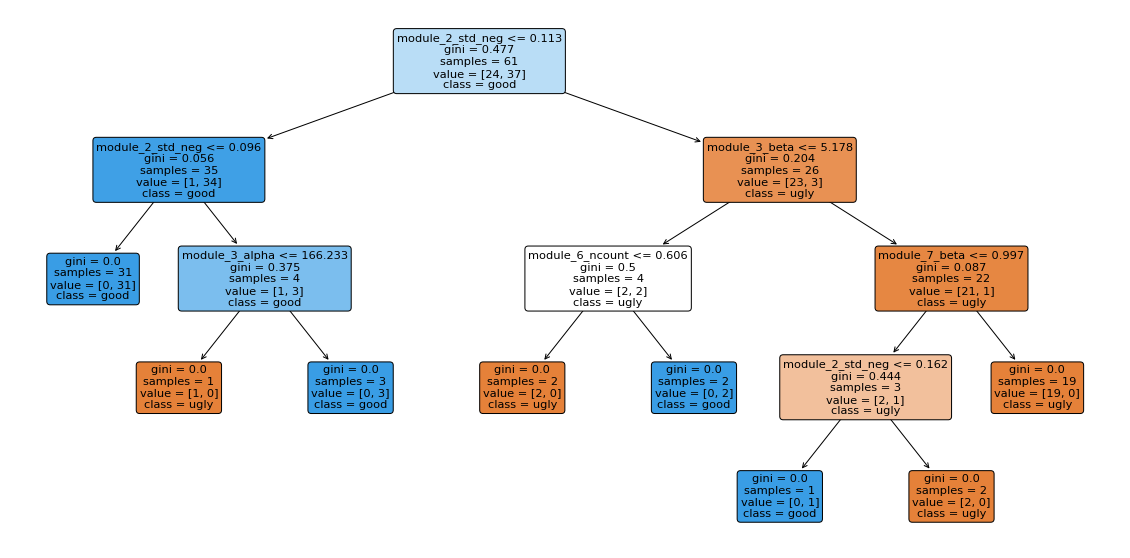

In [19]:
fig = plt.figure(figsize=(20, 10))
tree.plot_tree(clf_dt, 
          feature_names=ngs_reads.columns,
          class_names=['ugly', 'good'], 
          filled=True, impurity=True, 
          rounded=True)

#### Random Forest Training

In [20]:
clf_rf=RandomForestClassifier(n_estimators=100, verbose=True)

In [21]:
clf_rf.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestClassifier(verbose=True)

##### Random Forest performance

In [22]:
y_pred = clf_rf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.9259259259259259
Precision:  0.9411764705882353
Recall:  0.9411764705882353
F1 Score:  0.9411764705882353


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


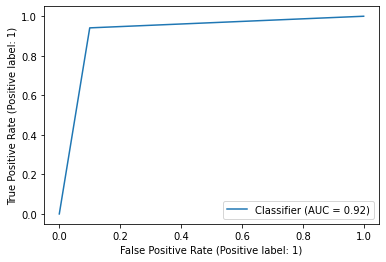

In [23]:
metrics.RocCurveDisplay.from_predictions(y_test, y_pred)

#### Feature Importance Random Forest

Text(0.5, 0, 'Relative Importance')

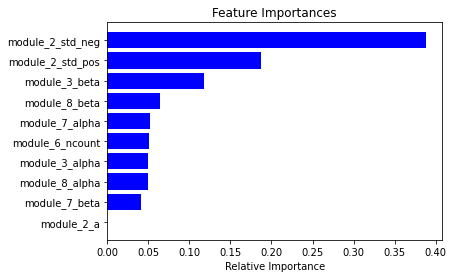

In [24]:
importances = clf_rf.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), X_train.columns[indices])
plt.xlabel('Relative Importance')

#### Random Forest with Cross Validation

In [25]:
clf_rf_cv = RandomForestClassifier(n_estimators=100)
scores = cross_validate(clf_rf_cv, ngs_reads, target, cv=5, 
                        scoring=('accuracy', 'f1'), return_train_score=True)
print("Accuracies: ", scores['test_accuracy'])
print("F1 Scores: ", scores['test_f1'])

# higher cv results in most accuracies = 1.0

print("Accuracy: %0.2f +/- %0.2f" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std()))
print("F1 Score: %0.2f +/- %0.2f" % (scores['test_f1'].mean(), scores['test_f1'].std()))

Accuracies:  [0.66666667 0.88888889 1.         0.94117647 0.88235294]
F1 Scores:  [0.625      0.91666667 1.         0.95238095 0.91666667]
Accuracy: 0.88 +/- 0.11
F1 Score: 0.88 +/- 0.13


#### Visualize some trees of the Random Forest

[Text(0.5, 0.9, 'module_2_std_neg <= 0.113\ngini = 0.47\nsamples = 39\nvalue = [23, 38]\nclass = good'),
 Text(0.3, 0.7, 'module_2_std_pos <= 0.053\ngini = 0.053\nsamples = 24\nvalue = [1, 36]\nclass = good'),
 Text(0.2, 0.5, 'module_2_std_pos <= 0.052\ngini = 0.133\nsamples = 10\nvalue = [1, 13]\nclass = good'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 9\nvalue = [0, 13]\nclass = good'),
 Text(0.3, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = ugly'),
 Text(0.4, 0.5, 'gini = 0.0\nsamples = 14\nvalue = [0, 23]\nclass = good'),
 Text(0.7, 0.7, 'module_8_alpha <= 0.085\ngini = 0.153\nsamples = 15\nvalue = [22, 2]\nclass = ugly'),
 Text(0.6, 0.5, 'gini = 0.0\nsamples = 9\nvalue = [16, 0]\nclass = ugly'),
 Text(0.8, 0.5, 'module_8_beta <= 6.443\ngini = 0.375\nsamples = 6\nvalue = [6, 2]\nclass = ugly'),
 Text(0.7, 0.3, 'module_6_ncount <= 0.743\ngini = 0.444\nsamples = 2\nvalue = [1, 2]\nclass = good'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = ugly'),
 Text(

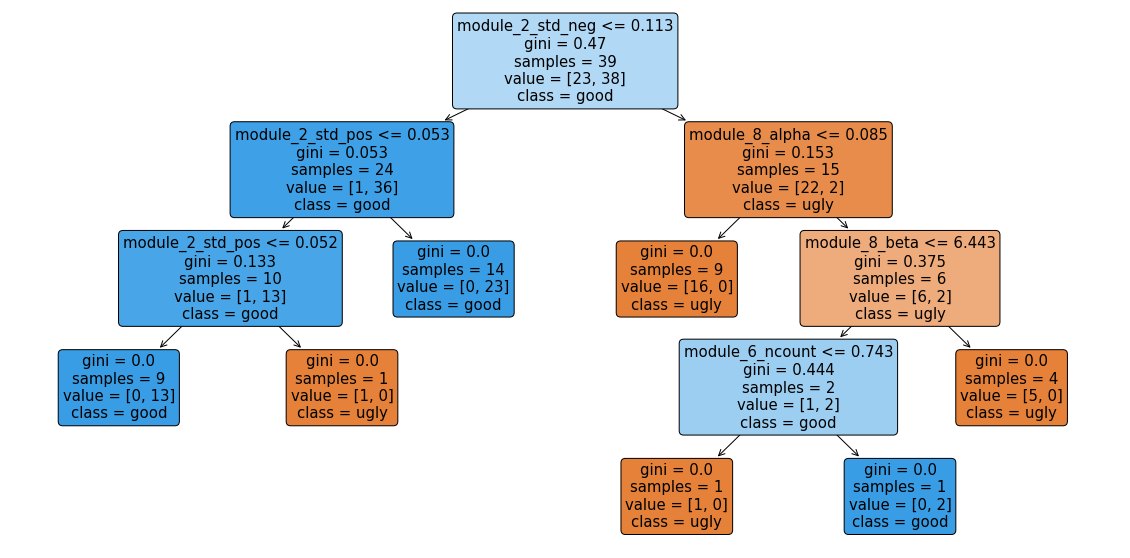

In [26]:
fig = plt.figure(figsize=(20, 10))
tree.plot_tree(clf_rf.estimators_[0], 
          feature_names=ngs_reads.columns,
          class_names=['ugly', 'good'], 
          filled=True, impurity=True, 
          rounded=True)

[Text(0.2857142857142857, 0.9166666666666666, 'module_2_std_neg <= 0.113\ngini = 0.489\nsamples = 40\nvalue = [26, 35]\nclass = good'),
 Text(0.14285714285714285, 0.75, 'gini = 0.0\nsamples = 19\nvalue = [0, 31]\nclass = good'),
 Text(0.42857142857142855, 0.75, 'module_7_alpha <= 170.509\ngini = 0.231\nsamples = 21\nvalue = [26, 4]\nclass = ugly'),
 Text(0.2857142857142857, 0.5833333333333334, 'gini = 0.0\nsamples = 9\nvalue = [15, 0]\nclass = ugly'),
 Text(0.5714285714285714, 0.5833333333333334, 'module_3_beta <= 5.189\ngini = 0.391\nsamples = 12\nvalue = [11, 4]\nclass = ugly'),
 Text(0.42857142857142855, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [0, 3]\nclass = good'),
 Text(0.7142857142857143, 0.4166666666666667, 'module_8_beta <= 4.616\ngini = 0.153\nsamples = 10\nvalue = [11, 1]\nclass = ugly'),
 Text(0.5714285714285714, 0.25, 'module_2_std_neg <= 0.154\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = ugly'),
 Text(0.42857142857142855, 0.08333333333333333, 'gini = 

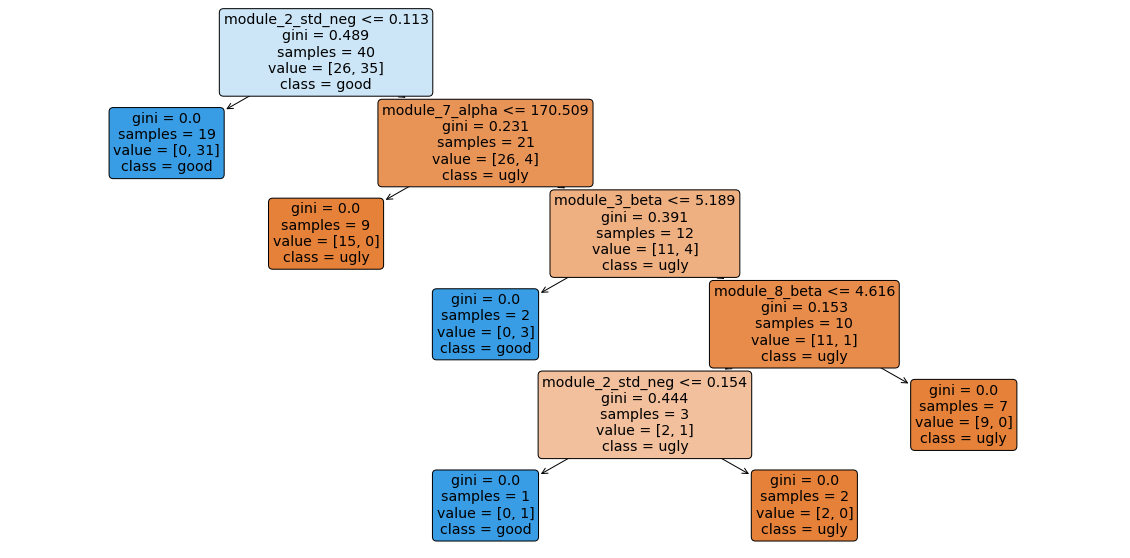

In [27]:
fig = plt.figure(figsize=(20, 10))
tree.plot_tree(clf_rf.estimators_[12], 
          feature_names=ngs_reads.columns,
          class_names=['ugly', 'good'], 
          filled=True, impurity=True, 
          rounded=True)

#### Other Classification Algorithms

Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
clf_lg = LogisticRegression(random_state=0).fit(X_train, y_train)

In [29]:
y_pred = clf_lg.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.8518518518518519
Precision:  0.8095238095238095
Recall:  1.0
F1 Score:  0.8947368421052632


Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB().fit(X_train, y_train)

In [31]:
y_pred = clf_gnb.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.8148148148148148
Precision:  0.8333333333333334
Recall:  0.8823529411764706
F1 Score:  0.8571428571428571


K Nearest Neighbors

In [32]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.8888888888888888
Precision:  0.8888888888888888
Recall:  0.9411764705882353
F1 Score:  0.9142857142857143
